In [1]:
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import sys
import os

In [2]:
reader = pd.read_csv('./fraud_detection/detection.csv', chunksize = 10000)
df = pd.DataFrame(columns=['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud'])

In [4]:
list_df = []
for chunk in reader:
    list_df.append(chunk)

In [19]:
df = list_df[0]
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [40]:
y = df['isFraud']
selected_columns=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

type_indexed = []
for i in range(len(df)):
    if df['type'][i] == 'CASH_IN':
        type_indexed.append(0)
    if df['type'][i] == 'CASH_OUT':
        type_indexed.append(1)
    if df['type'][i] == 'DEBIT':
        type_indexed.append(2)
    if df['type'][i] == 'PAYMENT':
        type_indexed.append(3)
    if df['type'][i] == 'TRANSFER':
        type_indexed.append(4)
        
X = df[selected_columns]

In [44]:
X['index_type'] = type_indexed

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [74]:
from sklearn.metrics import f1_score

f1_score(y_test,clf.predict(X_test), average=None, labels = [0,1])

array([0.98918752, 0.44444444])

In [62]:
clf.score(X_test,y_test)

0.9787878787878788

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

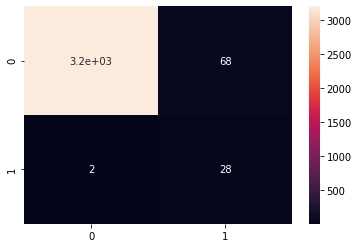

In [72]:
cf_matrix = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cf_matrix, annot=True)